In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [7]:
data_frame = pd.read_csv('/content/drive/My Drive/RESEARCH/Ovarian_Cancer_MDPI/OC_Blood_Routine.csv')
data_frame = data_frame.iloc[: , :-1]
data_frame.head

<bound method NDFrame.head of      Age    MPV  BASO#  BASO%   EO#   EO%   MCH   RDW   PDW    HGB  ...  LYM%  \
0     47  11.70   0.01   0.30  0.04  1.00  33.7  13.7  13.4   89.0  ...  16.8   
1     61  10.00   0.02   0.30  0.04  0.50  26.2  12.7  11.2  128.0  ...  17.2   
2     39  11.40   0.03   0.60  0.03  0.60  28.4  12.0  15.2  131.0  ...  23.7   
3     45   7.38   0.05   0.74  0.00  0.07  30.6  14.6  17.4  123.0  ...  27.2   
4     45  10.40   0.01   0.10  0.11  1.60  27.7  13.4  11.9  122.0  ...  28.8   
..   ...    ...    ...    ...   ...   ...   ...   ...   ...    ...  ...   ...   
344   52   9.90   0.00   0.00  0.01  0.30  31.1  11.9  10.8  142.0  ...  30.7   
345   37  11.90   0.00   0.00  0.02  0.30  18.9  17.7  17.3   80.0  ...  23.3   
346   59   9.70   0.02   0.60  0.05  1.50  29.4  11.6  10.4  144.0  ...  32.7   
347   30  10.50   0.03   0.30  0.23  2.20  28.8  12.5  13.4  154.0  ...  20.6   
348   39  10.30   0.01   0.20  0.04  0.80  31.0  12.1  11.0  128.0  ...  32.0  

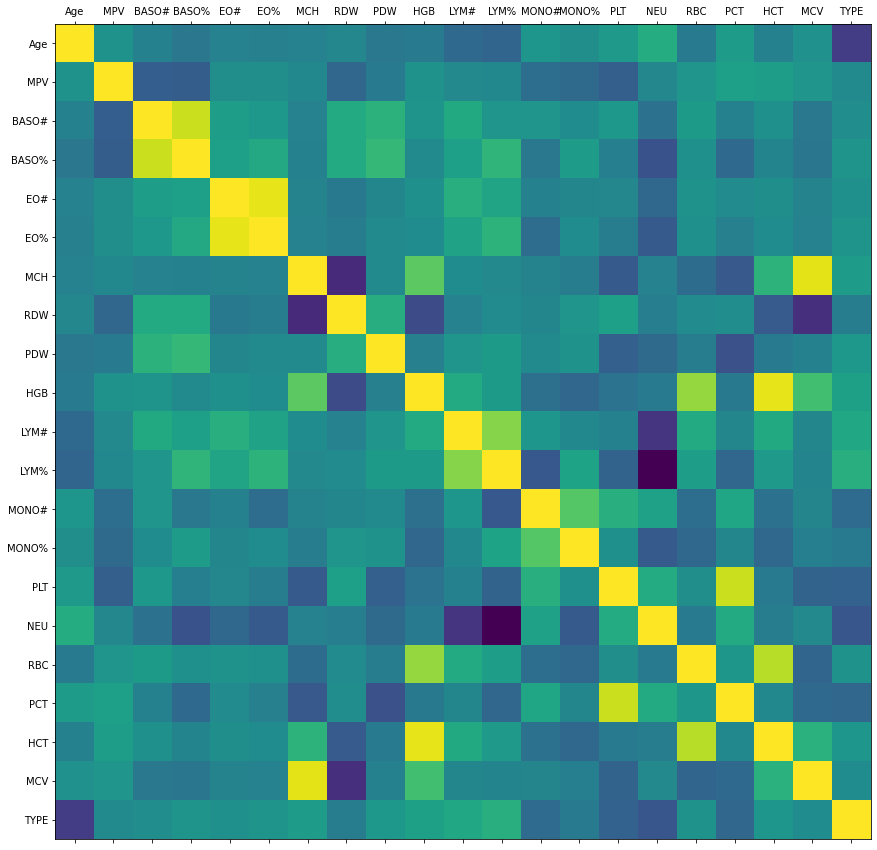

81.38% in training set
20.63% in test set


In [8]:
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['TYPE']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y) 

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train.shape

(284, 20)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(decision_tree,
                        param_grid=param_dict,
                        cv=5,
                        verbose=1,
                        n_jobs=-1) 

grid.fit(X_train, y_train)

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob1 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Train accuracy: 0.9577
Test accuracy: 0.8056
Precision: 0.8286
Recall: 0.7838
F1: 0.8056
AUC: 0.8062
Log Loss: 6.7159
Training confusion matrix
[[134   9]
 [  3 138]]
Testing confusion matrix
[[29  6]
 [ 8 29]]
Feature Importance
0.06581441729808378
0.0
0.0
0.03128798545181119
0.0
0.0
0.07799865985578024
0.0
0.05082674472408605
0.0
0.04760034254054283
0.018181365753080395
0.0
0.023282456342850893
0.039313991038152536
0.42913977366750794
0.0
0.11502269780034087
0.08412779077192199
0.01740377475584137


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train accuracy: 0.8697
Test accuracy: 0.8056
Precision: 0.7805
Recall: 0.8649
F1: 0.8205
AUC: 0.8039
Log Loss: 6.7160
Training confusion matrix
[[126  17]
 [ 20 121]]
Testing confusion matrix
[[26  9]
 [ 5 32]]
Feature Importance
0.32312888
0.069815494
0.0
0.0
0.0
0.0
0.0
0.0
0.07680809
0.0
0.060183577
0.0
0.0
0.0
0.098165736
0.24299276
0.0
0.1289054
0.0
0.0


In [12]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob3 = m_best.predict_proba(X_test)

Train accuracy: 0.9894
Test accuracy: 0.8056
Precision: 0.7556
Recall: 0.9189
F1: 0.8293
AUC: 0.8023
Log Loss: 6.7160
Training confusion matrix
[[140   3]
 [  0 141]]
Testing confusion matrix
[[24 11]
 [ 3 34]]
Feature Importance
0.1665517213646277
0.03368325484538304
0.014239778214339924
0.02099748496490658
0.02179936912742716
0.026635619091468075
0.039199923078368615
0.02305321121631508
0.04453982168409968
0.02604518390577495
0.05068187119386996
0.07690024755496394
0.02452567153420031
0.032399863418164115
0.061275050192231055
0.20110923004503226
0.027448407428251206
0.052651982332761554
0.026790483016820618
0.029471825790994173


In [13]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, refit = True, verbose = 3) 
  

grid.fit(X_train, y_train) 

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
#pred_prob4 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.825 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.719 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.649 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.768 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.825 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.719 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.649 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.768 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.825 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
#pred_prob5 = m_best.predict_proba(X_test)

Train accuracy: 0.7923
Test accuracy: 0.7917
Precision: 0.7895
Recall: 0.8108
F1: 0.8000
AUC: 0.7911
Log Loss: 7.1957
Training confusion matrix
[[109  34]
 [ 25 116]]
Testing confusion matrix
[[27  8]
 [ 7 30]]
Feature Importance
-0.9266517715373479
0.0046396960634778215
0.12984130529770704
-0.09699927573028508
-0.051062060389194
0.09306664988481299
0.24687972181513718
-0.06182403866287828
0.10808446649835851
0.15567086138490707
0.17861678162782932
0.11374372310187514
-0.1037788111070261
-0.1812184823551661
-0.2654851023983291
-0.3333257202362588
-0.007276015029660933
-0.1346309861717426
-0.03778873553990808
-0.2783837072401352


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [15]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, y)

params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate'] 
params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances=model.feature_importance(importance_type='gain')
for i in importances:
    print(i)
    
#pred_prob7 = model.predict_proba(X_test)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.197183	valid_1's binary_error: 0.277778
[8]	training's binary_error: 0.158451	valid_1's binary_error: 0.222222
[12]	training's binary_error: 0.151408	valid_1's binary_error: 0.208333
[16]	training's binary_error: 0.147887	valid_1's binary_error: 0.208333
[20]	training's binary_error: 0.15493	valid_1's binary_error: 0.208333
[24]	training's binary_error: 0.151408	valid_1's binary_error: 0.208333
[28]	training's binary_error: 0.130282	valid_1's binary_error: 0.208333
[32]	training's binary_error: 0.133803	valid_1's binary_error: 0.208333
[36]	training's binary_error: 0.130282	valid_1's binary_error: 0.208333
[40]	training's binary_error: 0.130282	valid_1's binary_error: 0.208333
[44]	training's binary_error: 0.126761	valid_1's binary_error: 0.208333
[48]	training's binary_error: 0.123239	valid_1's binary_error: 0.208333
[52]	traini

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc))

importances = baseline.feature_importances_

#Sort it
print ("GBM Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(feature_column_names)), reverse=True)
#print(importances)
print (sorted_feature_importance)
sorted_importances = importances.sort()

print('Training confusion matrix')
print(confusion_matrix(y_train, gbm_predict_train))
print('Testing confusion matrix')
print(confusion_matrix(y_test, gbm_predict_test))

print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))

for i in importances:
    print(i)

#pred_prob8 = baseline.predict_proba(X_test)

GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8194
GBM Log Loss: 6.2362
GBM AUC: 0.8189
GBM Sorted Feature Importance:
[(0.2889889054515509, 'NEU'), (0.19514665044288856, 'Age'), (0.06595358813151728, 'PCT'), (0.0560839681674037, 'LYM#'), (0.05380151662733894, 'PLT'), (0.04452035985433819, 'MPV'), (0.04194441068844887, 'PDW'), (0.040485804490522206, 'MCV'), (0.033664188886586, 'LYM%'), (0.031908177828999955, 'MCH'), (0.02434877503743678, 'MONO%'), (0.021770644446635585, 'HGB'), (0.020143152294005595, 'HCT'), (0.016768603171284285, 'RBC'), (0.016128423988361496, 'EO%'), (0.015597558431492369, 'MONO#'), (0.014012271180600952, 'RDW'), (0.01253900607486242, 'BASO%'), (0.004074212788206046, 'BASO#'), (0.0021197820175199067, 'EO#')]
Training confusion matrix
[[143   0]
 [  0 141]]
Testing confusion matrix
[[28  7]
 [ 6 31]]
Confusion Matrix for GBM
[[31  6]
 [ 7 28]]

Classification Report

              precision    recall  f1-score   support

           1       0.82      0.84      

In [17]:
from sklearn.metrics import roc_curve


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
#fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
#fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
#fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
#fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7, pos_label=1)
#fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

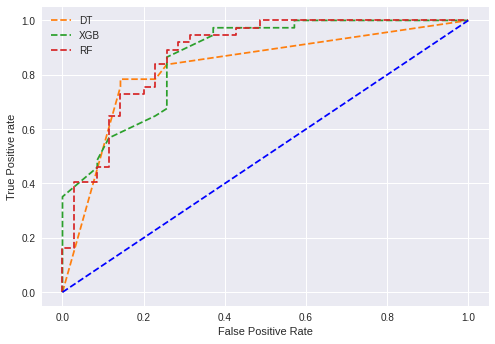

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='DT')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='XGB')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='RF')
#plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
#plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
#plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();